# Numerical Analysis Optional Assignment #
Name: Marco Sousa
<br> Date: November 29th
<br> Details: This is an optional assignment for MTH 361 (Numerical Analysis). We were to play with the MATLAB code relating to our numerical analysis course. Related code can be found [here](http://yanlaichen.reawritingmath.com/fall19_361/code/) courtesy of Professor Yanlai Chen @UMassD.

I'm not as confident with MATLAB as I am python, so I wrote the covered topis in ways I found intuitive in Python, and did some extra work for it (I chose to create code respective to each of the four sections we covered).
1. [Iterative Schemes](#first-bullet)
    1. Bisection
    2. Chord
    3. Secant
    4. Newton
    5. Fixed Point Iteration
2. [1D Lagrange Interpolation](#second-bullet)
3. [Numerical Integrations](#third-bullet)
    1. Midpoint
    2. Trap
    3. Simpson's
    4. Brief Error Order Analysis
4. [Numerical Derivation](#fourth-bullet)
    1. Forward Euler (Explicit)
    2. Backwards Euler (Implicit)

I often have my functions defined with Python Docstrings (labelled INPUT, OUTPUT, Functionality, Limitations) if additional info is needed on the output or if the example is not clear.
<br>
Recall that if you import the .py version of this for use, one can easily access the docstrings with ipython. Also recall if you import as mn, then mn. gives a list of the my functions.

In [1]:
#Importing
import numpy as np
from scipy.misc import derivative
#Altair would've looked better but lazy matplotlib is sufficient.
#import altair as alt
import matplotlib.pyplot as plt
#For Newton Iteration
from scipy.misc import derivative

In [2]:
# Here are some functions for us to play with.

def sinFunction(x):
    return (np.sin(x))

def polyFunc1(x):
    return((x-3)*(x-1))

def polyFunc2(x):
    return((x-1)*(x+1)*(x-2))

def polyFunc3(x):
    return(x**2 - 2)



# 1.Iterative Schemes <a class="anchor" id="first-bullet"></a> #

## Bisection ##

In [3]:
#The Code

def bisectToZero(f, a, b, epsilon):
    """
    INPUT: A function, point a on func f, point b on func f, epsilon accuracy
    OUTPUT: k num cuts, the value x for f(x)=0, and f(x) (should be about 0)
    Functionality: Converges to single zero point by bisection iteration.
    Limitation: Only recieves non differential functions in terms of 1 variable. AND relies on IVT (requires pos and neg value)
    Additional Note: It finds the LEFTMOST zero only if domain contains two+ zeroes
    """
    k = 0
    x = 0
    
    if(f(a)*f(b) < 0):
        x = (a+b)/2
        k = k+1
        
        while(abs(f(x)) > epsilon):
            if(f(a)*f(x) < 0):
                b = x
                x = (a+x)/2
                k = k+1
                #print(x) #if you want to show convergence
            elif(f(x)*f(b) < 0):
                a = x
                x = (x+b)/2
                k = k+1
                
            else:
                print("hmmMMMMMM!")
                break
            
    print("k number of cuts: %.0f , Value x: %f , Approximate f(x): %.10e"%(k,x,abs(f(x))))


In [4]:
#Testing

#This demonstrates the code's reliance on IVT:
bisectToZero(polyFunc1,-1,3.1,0.000000000001)

#This demonstrates the code finding the LEFTMOST Zero first and only:
bisectToZero(polyFunc2, -2, 3, 0.000001)

#Not just polynomial zeroes (Can also use sinFunction, for example):
bisectToZero(sinFunction, -np.pi, (9*np.pi/2), 0.0000001)

#Some normal bisections
bisectToZero(polyFunc1,-1.99,2.99,0.000000000001)
bisectToZero(polyFunc3,1,3,0.01)

k number of cuts: 0 , Value x: 0.000000 , Approximate f(x): 3.0000000000e+00
k number of cuts: 24 , Value x: -1.000000 , Approximate f(x): 3.5762788642e-07
k number of cuts: 25 , Value x: 12.566371 , Approximate f(x): 4.6813376776e-08
k number of cuts: 41 , Value x: 1.000000 , Approximate f(x): 4.5519144010e-13
k number of cuts: 8 , Value x: 1.414062 , Approximate f(x): 4.2724609375e-04


## Chord ##

In [5]:
def chordOptimize(f, x0, a, b, epsilon):
    """
    Input: A function, an initial guess, interval [a,b], and how close to zero you wish to be.
    Output: Returns list of iterations approaching a root a for f(a)=0. 
    Functionality: Constructs array carrying out Chord method.
    """
    iterativeList = []
    iterativeList.append(x0)
    
    xk = x0
    staticChord = ((b-a)/(f(b)-f(a))) #I call this here so it doesn't do the same calculation each time
    
    while (abs(f(xk)) > epsilon):
        
        #Carrying out secant by last 2 values in the list. Here we access that last 2 values
        xk = iterativeList[-1]
        
        #The Chord Formula. 
        nextGuess = xk - f(xk)*staticChord
        
        xk = nextGuess
        iterativeList.append(nextGuess)
    
    return(iterativeList)



In [6]:
#Testing

print("Secant for f(x)=((x-1)*(x+1)*(x-2))")
print(chordOptimize(polyFunc2, 2.9, 1, 3, 0.0000000000000001))
print("----------------------------------------------------------------------------")
print("Secant for f(x)=(x**2 - 2)")
print(chordOptimize(polyFunc3, 2.0, 1, 3, 0.0000000001))

#We can access the last value as our current final converged root a for f(a) = 0 in many ways if we wish.

Secant for f(x)=((x-1)*(x+1)*(x-2))
[2.9, 1.2327500000000002, 1.3324296933945317, 1.4618330049413615, 1.6148010177069199, 1.7696107867646227, 1.8923807252972908, 1.96182488217918, 1.9890127894520921, 1.9971328101581052, 1.9992749876545692, 1.9998182213660156, 1.9999545222995339, 1.9999886285066857, 1.999997156997361, 1.9999992892412575, 1.9999998223098092, 1.9999999555774208, 1.9999999888943532, 1.9999999972235882, 1.999999999305897, 1.9999999998264741, 1.9999999999566185, 1.9999999999891547, 1.9999999999972886, 1.999999999999322, 1.9999999999998306, 1.9999999999999576, 1.9999999999999893, 1.9999999999999973, 1.9999999999999993, 1.9999999999999998, 2.0]
----------------------------------------------------------------------------
Secant for f(x)=(x**2 - 2)
[2.0, 1.5, 1.4375, 1.4208984375, 1.4161603450775146, 1.4147828143349983, 1.4143802114005837, 1.4142623658001936, 1.4142278559705035, 1.4142177488197718, 1.414214788550556, 1.4142139215117826, 1.4142136675623491, 1.4142135931823114, 1.

## Secant ##

In [7]:
#The Code

def secantOptimize(f, x0, a, b, epsilon):
    """
    Input: A function, an initial guess, intrval [a,b], and how close to zero you wish to be.
    Output: Returns list of iterations approaching a root a for f(a)=0. 
    Functionality: Constructs array carrying out secant method. Don't need interval if another method other than Chord is chosen.
    """
    iterativeList = []
    
    iterativeList.append(x0)
    
    #The below performs one Chord on x0 to get x1. I could use another but chose arbitrarily.
    xk = x0 - ( (b-a)/(f(b)-f(a)) )
    iterativeList.append(xk)
    

    while ( abs(f(xk)) > epsilon):
        
        #Carrying out secant by last 2 values in the list. Here we access that last 2 values
        xk0 = iterativeList[-2]
        xk1 = iterativeList[-1]
        
        #The secant formula:
        nextGuess = xk0 - ((xk0-xk1) / (f(xk0)-f(xk1)))*f(xk0)
        
        xk = nextGuess
        iterativeList.append(nextGuess)
    
    return(iterativeList)
    

In [8]:
#Testing

print("Secant for f(x)=((x-1)*(x+1)*(x-2))")
print(secantOptimize(polyFunc2, 6.0, 1, 3, 0.000000000000001))
print("----------------------------------------------------------------------------")
print("Secant for f(x)=(x**2 - 2)")
print(secantOptimize(polyFunc3, 6.0, 1, 3, 0.000000000000001))

Secant for f(x)=((x-1)*(x+1)*(x-2))
[6.0, 5.75, 4.229249011857707, 3.536094928221902, 2.9228283568357423, 2.524257106566651, 2.253428014641911, 2.0964304462924255, 2.0236364764503874, 2.002688912351068, 2.00008239036833, 2.0000002945030158, 2.0000000000323492, 2.0]
----------------------------------------------------------------------------
Secant for f(x)=(x**2 - 2)
[6.0, 5.75, 3.1063829787234045, 2.242642642642643, 1.676287901229849, 1.4696138816874593, 1.418828773863678, 1.4143020821121974, 1.4142137065730414, 1.4142135623776078, 1.414213562373095]


## Newton ##

In [9]:
#The Code

def newtonOptimize(f, x0, epsilon):
    """
    Input: A function, an initial guess, and how close to zero you wish to be.
    Output: Returns an array of iterations approaching root.
    Functionality: Demonstrates convergence of newton method.
    """
    iterativeList = []
    
    #Storing my initial value in the list
    xk = x0
    iterativeList.append(xk)
    
    while ( abs(f(xk)) > epsilon):
        
        #These are the variables that make the Newton Method. Works off last element of the list
        xk = iterativeList[-1]
        func = f(xk)
        deriv = derivative(f,xk)
        
        nextGuess = xk - (func/deriv)
        iterativeList.append(nextGuess)
    
    
    return(iterativeList)



In [10]:
#Testing

print("Secant for f(x)=((x-1)*(x+1)*(x-2))")
print(newtonOptimize(polyFunc2, 6.0, 0.000000000000001))
print("----------------------------------------------------------------------------")
print("Secant for f(x)=(x**2 - 2)")
print(newtonOptimize(polyFunc3, 6.0, 0.000000000000001))

Secant for f(x)=((x-1)*(x+1)*(x-2))
[6.0, 4.333333333333333, 3.269705603038936, 2.621889504276323, 2.261451403583303, 2.090622768425154, 2.0263097258065086, 2.0069114729266615, 2.0017515277409257, 2.000439412175104, 2.0001099495270136, 2.000027493425289, 2.000006873734252, 2.0000017184571868, 2.000000429615773, 2.0000001074040354, 2.0000000268510147, 2.000000006712754, 2.0000000016781887, 2.000000000419547, 2.0000000001048868, 2.0000000000262217, 2.0000000000065556, 2.000000000001639, 2.00000000000041, 2.0000000000001026, 2.0000000000000258, 2.0000000000000067, 2.0000000000000018, 2.0000000000000004, 2.0, 2.0]
----------------------------------------------------------------------------
Secant for f(x)=(x**2 - 2)
[6.0, 3.1666666666666665, 1.8991228070175437, 1.4761202949637373, 1.4155117098049557, 1.4142141576301823, 1.4142135623732204, 1.4142135623730951, 1.414213562373095]


## Fixed Point Iteration ##

In [11]:
#The Code

def phi2(x):
    #From the function f(x) = 0 =  -x**2 + x + 1
    return 1 + 1/x

def fixedPointIteration(f, x_0, steps):
    """
    Input: A fixed point function, an initial guess, and the number of iterations you would like to take
    Output: Returns out k steps and array of values for each iteration in n steps
    Functionality: Takes n steps of fixed point iteration.
    Limitation: Does NOT test or garuntee convergence, simply carries out fixed point iteration task n times.
    """
    
    iterativeList = []
    x = x_0
    
    for i in range(0,steps):
        phi_x = f(x)
        x = phi_x
        iterativeList.append(x)
    
    
    return(iterativeList)
    
    

In [12]:
#Testing
print(fixedPointIteration(phi2, 2, 20))


[1.5, 1.6666666666666665, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614, 1.6180371352785146, 1.6180327868852458, 1.618034447821682, 1.618033813400125, 1.6180340557275543, 1.6180339631667064, 1.6180339985218035, 1.618033985017358, 1.6180339901755971]


# 2. Lagrange Interpolation <a class="anchor" id="second-bullet"></a> #

In [13]:
#More functions

def quad(x):
    return 4*(x-(1/2))**2

def cosSin(x,y):
    return (np.sin(2*np.pi*x))*(np.cos(2*np.pi*y))


In [14]:
#Some iterative Design: (Can skip)

#I had some issues understanding 2 things. Referencing, and how to construct a function with general x, but we don't know how many terms we will need x...
#This was me struggling to get just the denominators working (at first):

"""
def oneDLagrange(f, a, b, n):
    
    points = np.linspace(a, b, n)
    fValues = [f(x) for x in points]
    print(points)
    interpolateList = []
    
    denom = 1
    denomList = []
    
    for i in range(0, len(points)):
        for j in range(0, len(points)):
            if (i != j):
                print(i,j)
                tempDenom = points[j]-points[i]
                denom = denom*tempDenom
                #denomList[i] = denom
        #interpolateList.append(testVal)

    ftestVals = [f(x) for x in interpolateList]
    #ugh okay I need a better way to REFERENCE these in ONE step.
"""

#So the function wasn't even close to working, so I attempt to implement a python Class (as I recalled from DSC 201):

"""
class LagrangeClass:

    def __init__(self, xVals, yVals):
        #Constructors for n length, x array, and y array
        self.len = len(xVals)
        self.xVals = np.array(xVals)
        self.yVals = np.array(yVals)


    #Self paramater for all python classes. x are xPoints. j is tested index.
    def interpolate(self, x, j):
        
        #Python list comprehension. b = x-xi/(xj-xi) for i in LENGTH OF X
        
        #Double for loop...O(n**2), Yikez
        for j in range(self.len):
            z = [( (x - self.xVals[i])/(self.xVals[j] - self.xVals[i]) ) for i in range(self.len) if i != j]
            product = np.prod(b, axis=0) * self.yVals[j]
            z = [product] #I don't even know... LOL. 
            
            #print(z)
            #interpolation = ... the points of z? Their sum? Z seems to change size
        
        return interpolation
"""

# A really cool result of this is that a value input of x OR an array input for X works, so I solved my 'referencing' problem.
# However, this interpolation did not work for obvious reasons, and so I needed to better simplify (and understand) the idea of summing to j for many x-xi/xj-xi

"\nclass LagrangeClass:\n\n    def __init__(self, xVals, yVals):\n        #Constructors for n length, x array, and y array\n        self.len = len(xVals)\n        self.xVals = np.array(xVals)\n        self.yVals = np.array(yVals)\n\n\n    #Self paramater for all python classes. x are xPoints. j is tested index.\n    def interpolate(self, x, j):\n        \n        #Python list comprehension. b = x-xi/(xj-xi) for i in LENGTH OF X\n        \n        #Double for loop...O(n**2), Yikez\n        for j in range(self.len):\n            z = [( (x - self.xVals[i])/(self.xVals[j] - self.xVals[i]) ) for i in range(self.len) if i != j]\n            product = np.prod(b, axis=0) * self.yVals[j]\n            z = [product] #I don't even know... LOL. \n            \n            #print(z)\n            #interpolation = ... the points of z? Their sum? Z seems to change size\n        \n        return interpolation\n"

In [14]:
#The Code

class LagrangeClass:

    def __init__(self, xVals, yVals):
        #Constructors for n length, x array, and y array
        self.len = len(xVals)
        self.xVals = np.array(xVals)
        self.yVals = np.array(yVals)


    #Self paramater for all python classes. x are xPoints. j is tested index.
    def constructPoints(self, x, j):
        
        #Python list comprehension. b = x-xi/(xj-xi) for i in LENGTH OF X
        # CHARACTERISTIC POLYNOMIAL
        b = [( (x - self.xVals[i])/(self.xVals[j] - self.xVals[i]) ) for i in range(self.len) if i != j]
        
        #Our Characateristic * y values
        product = np.prod(b, axis=0) * self.yVals[j]
        return product

    def interpolate(self, x):
        
        #This creates a product for every j.
        b = [self.constructPoints(x, j) for j in range(self.len)]

        #Stacking the constructPoints(x,j) into one array.
        lagrange = np.sum(b, axis=0)
        return lagrange


Text(0, 0.5, 'Y')

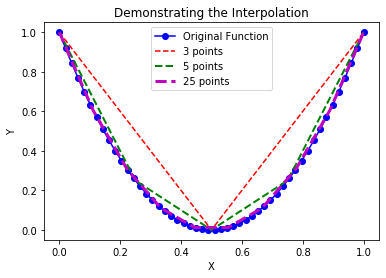

In [16]:
#Testing the Code

#X and Y are based on our original function.
X = np.linspace(0, 1, 50)
Y = [quad(x) for x in X]

#Creating a Lagrange object from our given x and y points from function.
lp = LagrangeClass(X, Y)


plt.plot(X, Y, "bo-", label = 'Original Function')

#New x are the points we wish to interpolate for the function.
#Interpolating 3 points
newX = np.linspace(0, 1, 3)
plt.plot(newX, lp.interpolate(newX), "r--" , label = '3 points')

#Interpolating 5 points
newX = np.linspace(0, 1, 5)
plt.plot(newX, lp.interpolate(newX), "g--", label = '5 points', linewidth=2)

#Interpolating 10 points
newX = np.linspace(0, 1, 10)
plt.plot(newX, lp.interpolate(newX), "m--", label = '25 points', linewidth=3)

plt.title("Demonstrating the Interpolation")
plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("Y")

#You can also call lp.constructPoints(X, 0) to only construct 1 point for a given j.
#print(lp.constructPoints(X,1))


#pandas has good interpolations, so I just use those rather than a direct Lagrange anyhow.

# 3. Numerical Integrations <a class="anchor" id="third-bullet"></a> #

In [17]:
#Function to integrate

# e^x
def eFunction(x):
    return np.exp(x)

#The 'Exact' integral from 0 to 1 of e^x :
exactIntegral = np.exp(1) - np.exp(0)

## Midpoint ##

In [18]:
#The Code:

def numMidIntegration(f, n, a, b):
    """
    Input: function f, and number of subintervals n, starting point a, ending point b
    Output: The Midpoint integration of f with n subintervals.
    Limitation: Not the most numerically efficient... but it gets the job done! 
    """
    
    #Generating x points based on our a to b integral. n SUBINTERVALS and n+1 POINTS
    pointsValues = np.linspace(a , b , n+1)
    deltax = (b-a)/n
    
    #Calculating the integrals for each interval and stores into list using (list comprehension format)
    integralsubIntervals = [deltax*f((pointsValues[a]+pointsValues[a+1])/2) for a in range(0,n)]
    
    #Summing the integrations
    summedIntegral = sum(integralsubIntervals)
    
    return(summedIntegral)


In [19]:
#Testing

approximateIntegral = numMidIntegration(eFunction, 2 , 0 , 1)
print("The Numerical integral is:",approximateIntegral)
print("The 'Exact' integral is:", exactIntegral)

error = abs(exactIntegral - approximateIntegral)

print("Error is:", error)

The Numerical integral is: 1.700512716650208
The 'Exact' integral is: 1.718281828459045
Error is: 0.017769111808837


Text(0, 0.5, 'Error')

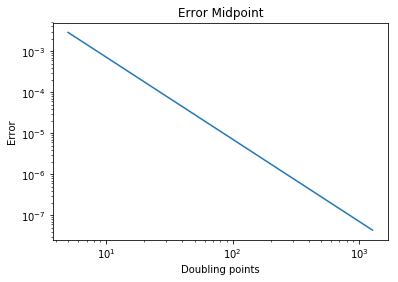

In [20]:
intervalList = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
errorListMid = []

#List comprehension constructs an error list
errorListMid = [abs(exactIntegral- numMidIntegration(eFunction, i, 0,1)) for i in intervalList]

plt.loglog(intervalList, errorListMid)
plt.title("Error Midpoint")
plt.xlabel("Doubling points")
plt.ylabel("Error")


## Trapezoidal ##

In [21]:
#The Code:

def numTrapIntegration(f, n, a, b):
    """
    Input: function f, and number of subintervals n, starting point a, starting point b
    Output: The Trapezoidal integration of f with n subintervals.
    Limitation: Not the most numerically efficient... but it gets the job done! 
    """
    
    #Generating x points based on our a to b integral. n SUBINTERVALS and n+1 POINTS
    pointsValues = np.linspace(a , b , n+1)
    deltax = (b-a)/n
    
    #Calculating the integrals for each interval and stores into list using (list comprehension format)
    integralsubIntervals = [(1/2)*deltax*(f(pointsValues[a])+f(pointsValues[a+1])) for a in range(0,n)]
    
    #Summing the integrations
    summedIntegral = sum(integralsubIntervals)
    
    return(summedIntegral)



In [22]:
#Testing

approximateIntegral = numTrapIntegration(eFunction, 2 , 0 , 1)
print("The Numerical integral is:",approximateIntegral)
print("The 'Exact' integral is:", exactIntegral)

error = abs(exactIntegral - approximateIntegral)

print("Error is:", error)

The Numerical integral is: 1.7539310924648255
The 'Exact' integral is: 1.718281828459045
Error is: 0.03564926400578039


Text(0, 0.5, 'Error')

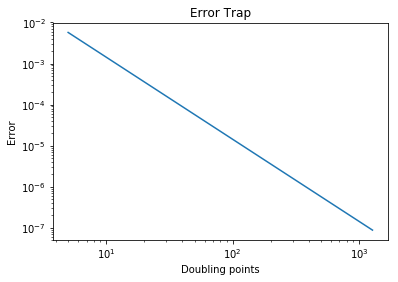

In [23]:
intervalList = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
errorListTrap = []

#List comprehension, constructs error list
errorListTrap = [abs(exactIntegral- numTrapIntegration(eFunction, i, 0,1)) for i in intervalList]

plt.loglog( intervalList, errorListTrap)
plt.title("Error Trap")
plt.xlabel("Doubling points")
plt.ylabel("Error")

## Simpson ##

In [24]:
#The Code:

def numSimpIntegration(f, n, a, b):
    """
    Input: function f, and number of subintervals n, starting point a, starting point b
    Output: The Simpsons integration of f with n subintervals.
    Limitation: Not the most numerically efficient... but it gets the job done!
    """
    
    #Choosing n subintervals means we are left with n+1 points.
    #However, each subinterval creates TWO subSUBintervals with weights 1/6,4/6,1/6. So we create 2*n+1 points and 2n subSUBintervals.
    #The above is the simplified method, rather than (personally) preferred 1/(# large subintervals)(1/6)*[1424242..1]; each large sub = weight of that interval
    
    pointsValues = np.linspace(a , b , (2*n+1) )
    deltax = (b-a)/(2*n)
    
    yValues = [f(pointsValues[a]) for a in range(0,2*n+1)]
                 
    summedIntegral = (deltax/3) * (yValues[0] + np.sum(4*yValues[1:-1:2]) + np.sum(2*yValues[2:-1:2]) + yValues[-1])
    
    return(summedIntegral)


In [25]:
#Testing - 3 subIntervals

approximateIntegral = numSimpIntegration(eFunction, 3 , 0 , 1)
print("The Numerical integral is:",approximateIntegral)
print("The 'Exact' integral is:", exactIntegral)

error = abs(exactIntegral - approximateIntegral)

print("Error is:", error)

The Numerical integral is: 1.7182891699208318
The 'Exact' integral is: 1.718281828459045
Error is: 7.341461786714021e-06


In [26]:
#Testing - 5 subIntervals

approximateIntegral = numSimpIntegration(eFunction, 5 , 0 , 1)
print("The Numerical integral is:",approximateIntegral)
print("The 'Exact' integral is:", exactIntegral)

error = abs(exactIntegral - approximateIntegral)

print("Error is:", error)

The Numerical integral is: 1.7182827819248236
The 'Exact' integral is: 1.718281828459045
Error is: 9.53465778552598e-07


Text(0, 0.5, 'Error')

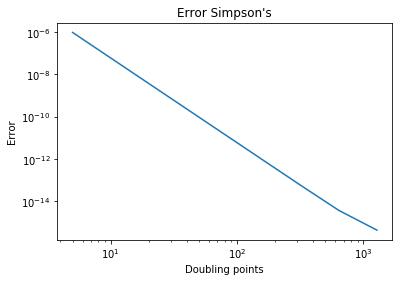

In [27]:
#Graphing Simpson's error for increasing i intervals

intervalList = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
errorListSimp = []

#List comprehension constructs an error list
errorListSimp = [abs(exactIntegral- numSimpIntegration(eFunction, i, 0,1)) for i in intervalList]

plt.loglog(intervalList, errorListSimp)
plt.title("Error Simpson's")
plt.xlabel("Doubling points")
plt.ylabel("Error")


Midpoint Order: 1.9996844569138494
Trap Order: 1.9998196979990706
Simpson Order: 3.9987126040809295


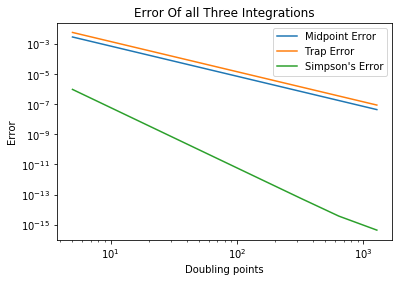

In [28]:
#Plotting the three errors on the same plot with loglog.

plt.loglog(intervalList, errorListMid, label = 'Midpoint Error')
plt.loglog(intervalList, errorListTrap, label = 'Trap Error')
plt.loglog(intervalList, errorListSimp, label = "Simpson's Error")
plt.title("Error Of all Three Integrations")
plt.xlabel("Doubling points")
plt.ylabel("Error")
plt.legend(loc='best')


#Demonstrating their order of error by the slope of their loglog transformation
slopeMid = abs ((np.log(errorListMid[2]) - np.log(errorListMid[1]) ) / (  np.log(intervalList[1]) - np.log(intervalList[0])))
print("Midpoint Order:",slopeMid)

slopeTrap = abs ((np.log(errorListTrap[2]) - np.log(errorListTrap[1]) ) / (  np.log(intervalList[1]) - np.log(intervalList[0])))
print("Trap Order:",slopeTrap)

slopeSimp = abs (( np.log(errorListSimp[1]) - np.log(errorListSimp[0])) / ( np.log(intervalList[1]) - np.log(intervalList[0])))
print("Simpson Order:",slopeSimp)


In [29]:
#tables are silly so I construct a Dataframe with pandas:

import pandas as pd

df = pd.DataFrame({
    'Mid Error': errorListMid,
    'Trap Error' : errorListTrap,
    'Simpson Error' : errorListSimp,
})

df = df.set_index([intervalList])
df

,Mid Error,Trap Error,Simpson Error
5,2.860465e-03,5.723791e-03,9.534658e-07
10,7.157420e-04,1.431663e-03,5.964481e-08
20,1.789746e-04,3.579605e-04,3.728633e-09
40,4.474611e-05,8.949291e-05,2.330529e-10
80,1.118668e-05,2.237340e-05,1.456613e-11
160,2.796679e-06,5.593362e-06,9.106049e-13
320,6.991705e-07,1.398341e-06,5.706546e-14
640,1.747927e-07,3.495853e-07,3.774758e-15
1280,4.369817e-08,8.739633e-08,4.440892e-16


# Numerical Derivatives <a class="anchor" id="fourth-bullet"></a> #

There are several forms of Numerical Integration, such as Forward Euler, Backwards Euler, Crank Nicholson, Heun's Method, multistep methods, and so on. I chose to do one explicit and one implicit. 
</br>
It is far more efficient (no arrays) and sometimes cleaner to use sympy or scipy to solve partial differential equations. However, using these defeats the purpose of demonstrating the numerical technique.
</br>
The [numfy module](https://www.numfys.net/modules/) is another more efficient (but far less intuitive) guideline to complete this task.

In [30]:
#An Initial Value Problem to numerically derive

def ODE01(t, y_t):
    dydt = 3*y_t + t
    return dydt

def ODE02(t, y_t):
    dydt = 3*y_t
    return dydt

#Initial values: y(0) = 1
#I take this as a seperate paramater in each functions


## Forward Euler ##

In [31]:
#The Code (Array version)

def forwardEulerArray(dydt, t0, y0, tn, n):
    """
    INPUT: derivative dydt = f(tn, yn) = ... , t0 an initial t point, y0 an initial y value., tn a final t point to calculate, n steps. If you want only the initial step, then n=1.
    OUTPUT: An array of iterations for the numerical derivation.
    Functionality: Solves a simple ODE IVP for f(tn).
    Limitations: Isn't as efficient scipy or sympy, but the approach is intuitive.
    """
    
    h = (tn- t0)/(n)
    t = np.linspace(t0, tn, n)
    u = [y0]
    
    
    for n in range(0, len(t)):
        nextU = u[n] + h* dydt(t[n], u[n])
        
        u.append(nextU)
    
    return u


In [32]:
#The Code (Last Derivative version)


def forwardEuler(dydt, t0, y0, tn, n):
    """
    INPUT: derivative dydt = f(tn, yn) = ... , t0 an initial t point, y0 an initial y value., tn a final t point to calculate, n steps. If you want only the initial step, then n=1.
    OUTPUT: A numerical derivative on the given interval.
    Functionality: Solves a simple ODE IVP for f(tn).
    Limitations: Isn't as efficient scipy or sympy, but the approach is intuitive. 
    """
    
    # h creates a deltat interval, t are the set of t values from t0 to tN ( or tn; final t), u approx recognizes we are going from y to u, since we have truncation error and no longer work with y
    h = (tn- t0)/(n)
    t = np.linspace(t0, tn, n)
    uApprox = y0
    
    for n in range(0, n):
        uApprox = uApprox + h* dydt(t[n], uApprox)
        
    return uApprox



In [33]:
#Testing

FEList = forwardEulerArray(ODE02, 0, 1, 2, 1000000)
print(FEList[-1])

approx = forwardEuler(ODE02, 0, 1, 2, 1000000)
print(approx)


403.4215318688789
403.4215318688789


## Backwards Euler ##

In [34]:
# I followed the Numfy module closely to complete this task (thus, please mark that this this is not directly my code)
#The essential idea is to derive an implicit formula for the given partial differential function with the backards Euler.
#We can reearange the formula to 


def func(x_new, x_old, t_new, dt):
    """ The function f(x) we want the root of."""
    return x_new - x_old - dt*(np.cos(x_new) + np.sin(t_new))


#This is the implicit formula we have for the differential function: cos(y(t)) + sin(t). We could change this and g(yn+1, tn+1) would be different four our backwards formula here.
def ODEfunc(y_t1, y_t0, tn, h):
    """ The ODE we will be using in the backwards Euler"""
    return y_t1 - y_t0 - h*(np.cos(y_t1) + np.sin(tn))

#This is the derivative of the above ODE function in terms of dt. Using something like derivative() from scipy would be silly since we could use scipy to solve the ODE, so this is hard coded and would have to be changed.
def dfuncdx(y_t1, h):
    """ The derivative of the implicit ODE in terms of dt"""
    return 1+h*np.sin(y_t1)


def newton(y_t0, tn, dt, epsilon=1e-12):
    """ 
    INPUT: y_t0 and tn, a level of precision epsilon
    OUTPUT: y_t1
    Functionality:finds the root of the function f(y_t1)
    limitation: Requires the input for ODEfunc and dfuncdx already found and expressed in an implicit formula
    """
    
    # initial guess:
    y_t1 = y_t0
    f = func(y_t1, y_t0, tn, h)
    dfdx = dfuncdx(y_t1, h)
    
    while abs(f/dfdx) > epsilon:
        y_t1 = y_t1 - f/dfdx
        f = func(y_t1, y_t0, tn, h)
        dfdx = dfuncdx(y_t1, h)
        
    return y_t1


In [35]:
#Formatting matplotlib for the next figure

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

This is where the derivative is calculated and demonstrated
</br>
Recall this is not my original code, please look at the [Numfy Implicit Euler](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb) module for more information.

x_N = 1.742352


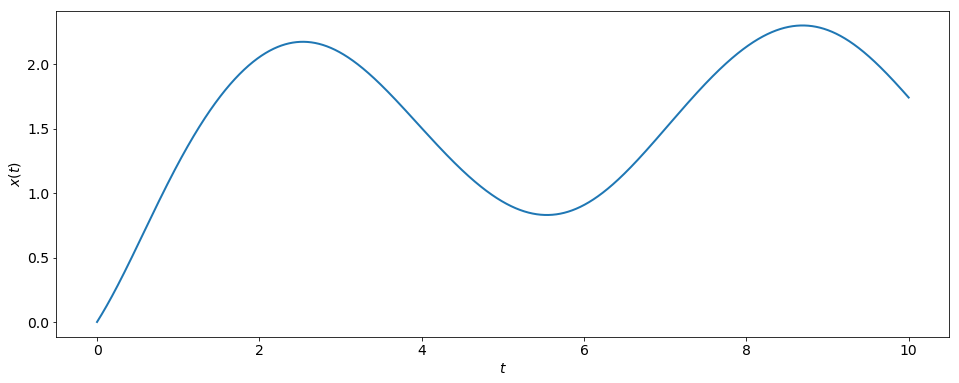

In [37]:
#Using the newton and ODE functions to find the backwards Euler

h = 0.001  #step size
tN = 10  # last time
N = int(tN/h)

#Creating t values, and an array of x(t) values filled with 0 to store into for the next step
t = np.linspace(0, tN, N+1)
x = np.zeros(N+1)

# The initial value for the IVP
x[0] = 0

#We calculate the next value using the root we find in the newton equation, which is really neat and ties with our prior numerical knowledge quaintly!
for n in range(N):
    x[n+1] = newton(x[n], t[n+1], h)

#Printing the final deriv. value in x[t]
print(r'x_N = %f' % x[-1])

#Plotting the x(t) versus t
plt.plot(t,x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid();